Practical 2: Clustering
<br>
Monday, 13th May 2024
<br>
Lecturer: Adi Wibowo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Ambil data dari file CSV dan pastikan setiap value bertipe integer 
# ------------------------------------------------------------------
data = pd.read_csv('reviews_u746_a44_2.csv', usecols=['uid','anime_uid','score'] )
data['uid'] = data['uid'].astype(int)
data['anime_uid'] = data['anime_uid'].astype(int)
data['score'] = data['score'].astype(int)
data = data.drop_duplicates(subset=['uid','anime_uid'], keep='first')

In [3]:
print(data.head(20))

       uid  anime_uid  score
0    80240       1293     10
1   239739       1293      7
2   197404       1293      7
3    25289       1293      8
4    20138       1293     10
5   252899       1293     10
6    93091       1293      8
7    86805       1293      9
8   246441       1293     10
9   285221       1293     10
10   34781       1293      7
11  321119       1293     10
12  263835       1293     10
13  171855       1293      8
14  172213       1293      9
15      34       1293      9
16   46091       1293      8
17  252145         87      6
18  220980         87      9
19   86377         87      6


In [4]:
print(data["uid"].value_counts())

uid
86805     20
93091     19
34781     19
321119    19
239739    18
          ..
255991     1
80630      1
88655      1
208696     1
321144     1
Name: count, Length: 287, dtype: int64


In [5]:
# # Struktur data belum sesuai untuk clustering lakukan pivot agar sesuai
# # ---------------------------------------------------------------------
pivot = pd.pivot_table(data, values='score', index='uid', columns='anime_uid')
#Mengganti nilai Nan dengan median  --> not normal/skewed
# pivot.fillna(pivot.median(numeric_only=True), inplace = True)
#Mengganti nilai Nan dengan mean --> Normal Distribution
# pivot.fillna(pivot.mean(numeric_only=True), inplace = True)
#Mengganti nilai Nan menjadi angka
pivot.fillna(0, inplace = True) #use our assumptions
print(pivot.head(10))

anime_uid  26      60      71      87      123     255     290     477     \
uid                                                                         
34            9.0     8.0     6.0     8.0     8.0     0.0     6.0     0.0   
6907          0.0     0.0     0.0     0.0     0.0     8.0     0.0     0.0   
8347          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9537          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
11573         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
11936         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12162         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12225         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12275         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12404         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

anime_uid  556     669     ...  22831   23385   25875   28085   28927   \
u

In [6]:
# Mencari jumlah cluster yang paling sesuai untuk data (Elbow & silhoutte method)
# -------------------------------------------------------------------
inertias = []
sscores = []
for i in range(2,31):
    model = KMeans(n_clusters=i,n_init=20)
    model.fit(pivot)
    labels = model.predict(pivot)
    inertias.append(model.inertia_)
    sscores.append(silhouette_score(pivot, labels) * 20000) #calculste distance from 1 cluster to another cluster

c:\Users\Alfred\anaconda3\envs\kuliah\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Alfred\anaconda3\envs\kuliah\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Alfred\anaconda3\envs\kuliah\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Alfred\anaconda3\envs\kuliah\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarn

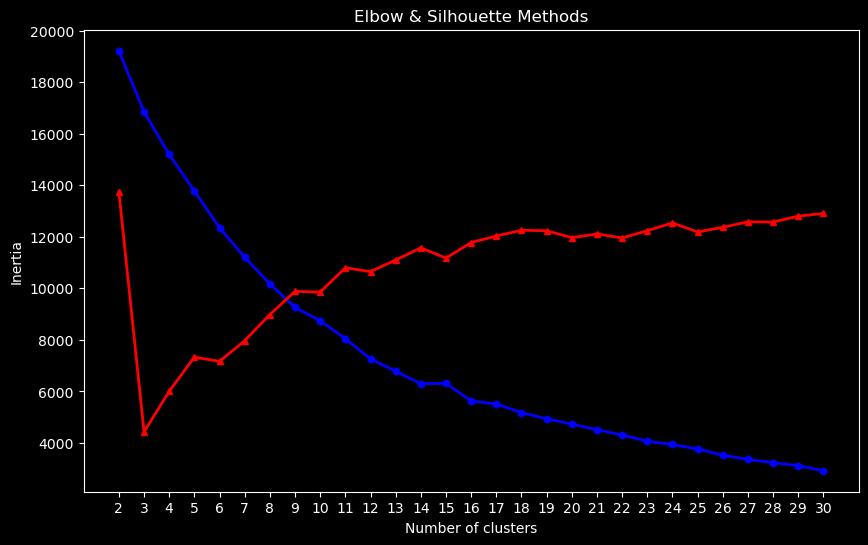

In [7]:
plt.figure(figsize=(10,6))
plt.plot(range(2,31), inertias, marker='h',markersize=5,linewidth=2,color='blue',linestyle='solid')  # .,ov^<>12348spP*h+xD|_
plt.plot(range(2,31), sscores, marker='^',markersize=5,linewidth=2,color='red',linestyle='solid')  # .,ov^<>12348spP*h+xD|_
plt.xticks(range(2, 31))
plt.title('Elbow & Silhouette Methods')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Lakukan clustering sesuai jumlah clustering yg disarankan elbow method di atas
# Create plot to take decision --> for out next step
# ------------------------------------------------------------------------------
n_clusters = 16
model = KMeans(n_clusters=n_clusters, n_init=20)
labels = model.fit_predict(pivot)



c:\Users\Alfred\anaconda3\envs\kuliah\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [9]:
print(model.cluster_centers_)

[[ 2.22044605e-16  2.22044605e-16  2.22044605e-16 -5.55111512e-17
  -1.11022302e-16  0.00000000e+00 -1.11022302e-16 -2.22044605e-16
  -2.77555756e-17  5.55111512e-17  1.11022302e-16  0.00000000e+00
   1.11022302e-16  5.55111512e-17  7.15000000e+00  1.11022302e-16
   0.00000000e+00  0.00000000e+00 -6.93889390e-18 -1.11022302e-16
  -6.66133815e-16 -2.77555756e-17 -1.38777878e-17  1.11022302e-16
   2.22044605e-16 -1.11022302e-16  2.22044605e-16  0.00000000e+00
   1.38777878e-17 -1.11022302e-16 -1.38777878e-17 -1.11022302e-16
   5.55111512e-17  0.00000000e+00 -1.11022302e-16  1.11022302e-16
  -5.55111512e-17]
 [ 4.44089210e-16  3.33066907e-16  3.33066907e-16  0.00000000e+00
   1.11022302e-16  6.93889390e-18  0.00000000e+00 -1.11022302e-16
   0.00000000e+00  1.11022302e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  1.11022302e-16  2.22044605e-16  3.33066907e-16
   6.93889390e-18  0.00000000e+00  0.00000000e+00  1.66533454e-16
  -8.88178420e-16 -1.38777878e-17 -6.93889390e-18  1.6653

In [10]:
print(labels)

[15 11  3  3  0  3 11  3  3  3  3  0 11  3  3 11  3 11  3 11  9  3  3 10
 11  3 11 13  4  3  3 15 11  3  3  3  3 11  3  3  3  3  3  3 11  5  2 11
  3 11 13  9 11 11 11 11  9  9 11  3  3 11  8  8  8  8  8  8  3 11  3 11
  8  8  3  8  3  8  8 11 11 11 11  8 10  3 15 15  3 10 10 11  8  2  8 11
 11 12 11 11 12  3  3 12  5 12 12  5 12  5 11  0  5 11 12  5 12 11 12 11
  5  7 12  0 12 12  5 11  5 12 12 11  0 11 11  5 12 11  8  3  7 13 12  8
 11  8 11 14  0 14  5  8 10  1  5  1  1  1  7  5  7  1  1  5  1  1  0  1
  0 11  1  1  7  7  1  1  1  1  1  7  0 13  5  1 10  7  3 11  1 10  0  7
  1  4  5  7  5  7  3  1 15  0 11 14 10 11  5  7 10  0 10  7 11  8 11  1
  1  5 11 14  4  0  8 10  8 11 11 12  0  7  5  0  8 11  7  4  5 11  5  3
  5  0  0 11  8  0  7 11  1  7 14  7 12 11 11  7  4  6  6  6  6  6  6  3
  8 11 11 11  3  0  3  6 11 11  5 11  1  0 11  8  3 11 11 11 11  8 11]


In [11]:
# Buat list yang berisi member tiap cluster
# -----------------------------------------
clusters=[]
for i in range(0,n_clusters): clusters.append([])
i = 0
for label in labels:
    clusters[label].append(pivot.index.values[i])
    i=i+1

In [14]:
len(clusters)

16

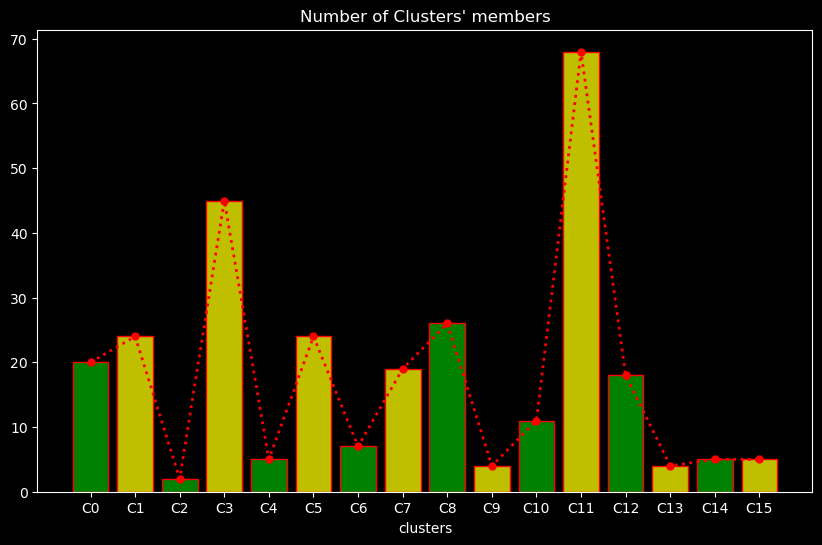

In [12]:
# Tampilkan barplot yang menunjukkan jumlah member tiap cluster
# -------------------------------------------------------------
height = []
tick_labels = []
for i in range (0,n_clusters): 
    height.append(len(clusters[i]))
    tick_labels.append('C'+str(i))
    
plt.figure(figsize=(10,6))
plt.bar(range(0,n_clusters), height=height, tick_label=tick_labels,color=['g','y'],edgecolor='r')
plt.title('Number of Clusters\' members')
plt.xlabel('clusters')
plt.yticks(range(0, max(height)+10,10))
plt.plot(range(0,n_clusters), height, marker='o',markersize=5,linewidth=2,color='red',linestyle='dotted')
plt.show()


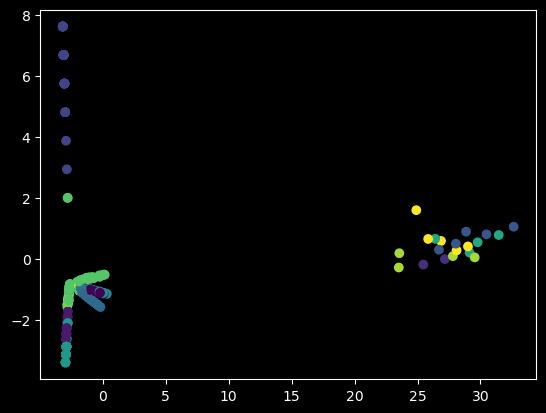

In [13]:
# Jumlah dimensi terlalu besar (108D) untuk ditampilkan di layar (2D)
# Dimension reduction
# Kurangi dimensi agar bisa ditampilkan di layar
# ------------------------------------------------------------------
dims = PCA(n_components=2,svd_solver='randomized',random_state=0).fit_transform(pivot)
dims = pd.DataFrame(dims,columns=['PC1','PC2'])
plt.scatter(dims.loc[:,'PC1'], dims.loc[:,'PC2'],c=labels)
plt.show()